# PA 1: Exploratory Analysis over Income_dataset

# 1.Introduction 

The Income_dataset is analyzed using Python language. There are 15 attributes and they are
age, workclass, final-weight, education, educational_num, marital-status, occupation, relationship, race, gender, capital-gain,
capital-loss, hours-per-week, native-country, income > 50K.

## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns


# 2.Retreiving the data

1. Read the csv file income_dataset using Pandas
2. The attributes we use to solve the task1 are educational-num, capital-gain, native-country

# Reading Dataset
The Python code below reads the Income dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('income_dataset.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

age  workclass  final-weight     education  educational-num  \
0   67    Private        366425     Doctorate               16   
1   17    Private        244602          12th                8   
2   31    Private        174201     Bachelors               13   
3   58  State-gov        110199       7th-8th                4   
4   25  State-gov        149248  Some-college               10   

       marital-status        occupation   relationship   race gender  \
0            Divorced   Exec-managerial  Not-in-family  White   Male   
1       Never-married     Other-service      Own-child  White   Male   
2  Married-civ-spouse   Exec-managerial        Husband  White   Male   
3  Married-civ-spouse  Transport-moving        Husband  White   Male   
4       Never-married     Other-service  Not-in-family  Black   Male   

   capital-gain  capital-loss  hours-per-week native-country income > 50K  
0         99999             0              60  United-States          Yes  
1             0             0              15  United-States           No  
2             0             0              40  United-States          Yes  
3             0             0              40  United-States           No  
4             0             0              40  United-States           No

# 3.Glimpse of the data

# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [4]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc) 
# https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ 
# https://www.youtube.com/watch?v=Ty9TWZ7js6A&t=1s 
print (">>Task 1-a: Details of df_data data frame are: \n", df_data.columns.values.tolist())

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame. 
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe 
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols))

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'educational-num' column of the df_data 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html 
# If the dtype is float64, there no unique, top, freq 
print ("\n\n>>Task 1-c: Descriptive details of 'educational-num' column are\n", df_data['educational-num'].describe())

# 10 points
#Task 1-d: Print ALL the unique values of Capital-gain and Print ALL the unique values of Native-Country. 
# https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/ 


# create new dataframe, repeating or chaining as appropriate 

num_uniq_capital_gain = df_data["capital-gain"].unique()
num_uniq_native_country = df_data["native-country"].unique()


print ("\n\n >>Task 1-d:")
print(num_uniq_capital_gain)

print("#####################################################")
print(num_uniq_native_country)



>>Task 1-a: Details of df_data data frame are: 
 ['age', 'workclass', 'final-weight', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income > 50K']


>>Task 1-b: Number of rows:43957 and number of columns:15


>>Task 1-c: Descriptive details of 'educational-num' column are
 count    43957.000000
mean        10.074118
std          2.575092
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64


 >>Task 1-d:
[99999     0  2653  4386  6849  5178 15024  4416  2964  2829  2176  5013
   594  2174  3137  7688  1086  3674 14344  4865  7298  9386 27828  7978
  3471 14084  1797  6497 10520  2414  2580  3103  4650  3942  3325  2354
  2597 13550  2407  4931 20051  4787  1455  1831  5060  2202  1173  6418
  2105  4101  8614  4064  3411  4508  3464  2885 25124  7443  3908   914
  9562  651

# 4. Check for Missing Values 

In [16]:
df_data.isnull().sum()


age                   0
workclass          2498
final-weight          0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income > 50K          0
dtype: int64

Except for workclass and occuptaion there are no missing values for other features.The feature workcalss has 2498 missing values and
the feature occupation has 2506 missing values

# 5.Data Exploration 

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [5]:
# 8 points
#Task 2-a: Find out the race with largest number of records  
# https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column/48590361 
Largest_race = df_data['race'].value_counts()[:1].index.tolist()


print (">>Task 2-a: The Race with the largest number of records is %s"
            % (Largest_race))



# 8 points
#Task 2-b: #Task 2-b: Find out the total number of doctorate who are married 
# http://net-informations.com/ds/pd/mcolumns.htm 
# selesting multiple column value 
# query the data frame 
selecting_education_marital = df_data[['education','marital-status']][(df_data["education"] == "Doctorate") & (df_data["marital-status"] == "Married-civ-spouse")]
# selecting_education_marital = df_data[(df_data["education"] == "Doctorate") & (df_data["marital-status"] == "Married-civ-spouse")]
# print(selecting_education_marital)
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe 
# count the row 
num_doctorate = selecting_education_marital.shape[0]
print ("\n\n>>Task 2-b: The total number of doctorate who are married %s"
        % (num_doctorate))


# # 14 points
# #Task 2-c: Find out the top 10 countries with the highest income.

# top10_countries = 
# print("\n\n>>Task 2-c: top 10 countries with the highest income: \n%s" % (top10_countries))

#Task 2-c: Task 2-c: Find out the top 10 counties with the most male.

# http://net-informations.com/ds/pd/mcolumns.htm 
# selesting multiple column value 
# query the data frame 
selecting_gender_country = df_data[['gender', 'native-country']][(df_data['gender'] == "Male")]
# print(selecting_gender_country)
# https://stackoverflow.com/questions/22291395/sorting-the-grouped-data-as-per-group-size-in-pandas 
# sort group data
all_males = selecting_gender_country.groupby(['native-country']).size().sort_values(ascending=False)
# print top 10 row 
top10_males = all_males.head(10)
print ("\n\n>>Task 2-c: top 10 counties with the most male \n%s" % (top10_males))




>>Task 2-a: The Race with the largest number of records is ['White']


>>Task 2-b: The total number of doctorate who are married 363


>>Task 2-c: top 10 counties with the most male 
native-country
United-States    26299
Mexico             681
Unknown            545
Philippines        165
India              117
Germany            110
Puerto-Rico        100
Canada              99
El-Salvador         95
China               84
dtype: int64


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

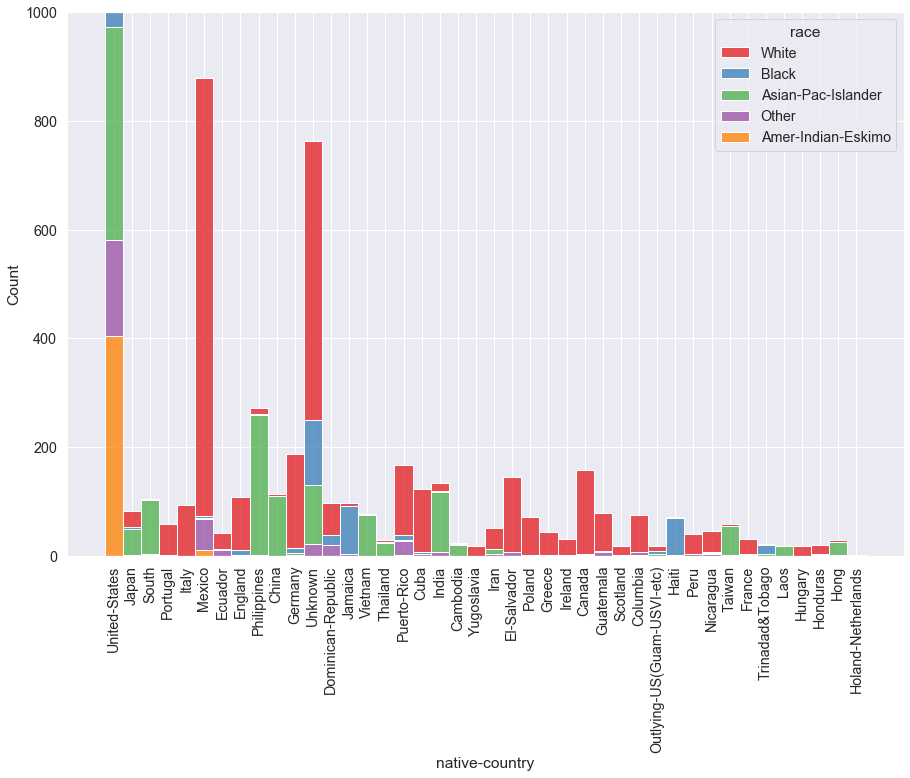

In [6]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the race count for each country . 
# Think of a way to nicely visualize all the ratings! 
#########################begin code for Task 3-a
# Plot the race count for each country 
# https://www.youtube.com/watch?v=Bjz00ygERxY&ab_channel=KimberlyFessel 
# https://towardsdatascience.com/beautifying-the-messy-plots-in-python-solving-common-issues-in-seaborn-7372e6479fb 
# https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html 
# Setting up size, rotation, and y axis 
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 90)
plt.ylim(0, 1000)
# Seaborn hue color 
# https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name 
# https://www.codecademy.com/articles/seaborn-design-ii 
unique = df_data["race"].unique()
palette = dict(zip(unique, sns.color_palette("Set1", 10)))
# show the histogram 
sns.histplot(x="native-country", data=df_data, hue="race", multiple="stack", palette=palette)
#########################end code for Task 3-a

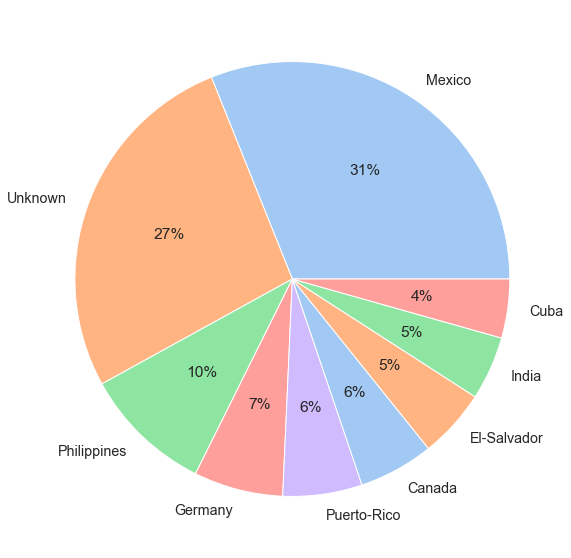

In [7]:
# 20 points
# Task 3-b: Draw a pie chart that represents the top 10 native country 
#########################begin code for Task 3-b 
# Count unique value 
# https://dfrieds.com/data-analysis/value-counts-python-pandas.html  
country_count = df_data["native-country"].value_counts()
# Convert label to list 
# https://note.nkmk.me/en/python-pandas-list/ 
country_name_list = list(country_count.index)
# Convert data to list 
# https://note.nkmk.me/en/python-pandas-list/ 
amount_of_country_list = list(country_count.values.tolist())
# show pie chart 
# https://www.statology.org/seaborn-pie-chart/ 
#define data
data = amount_of_country_list[1:10]
labels = country_name_list[1:10]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(15, 10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

Total number of Males: 29400
Total number of femals: 14557
Male percentage in dataset 66.8835452828901
Female percentage in dataset 33.1164547171099
Males whose income is greater than 50K: 8928
Females whose income is greater than 50K: 1590
Percentage of males whose income is greater than 50K 30.36734693877551
Percentage of Females whose income is greater than 50K 10.92258020196469


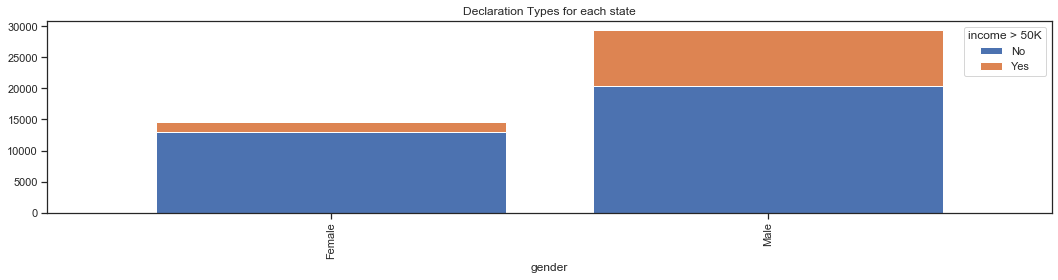

In [17]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(18,7))
df_data.groupby(['gender','income > 50K']).size().unstack().plot(kind='bar',stacked=True,  width=0.8, ax=ax)

#****************************************************************************************************************
print("Total number of Males:" ,len(df_data[df_data["gender"] == "Male"]))
print("Total number of femals:", len(df_data[df_data["gender"]=="Female"]))
Male_count = len(df_data[df_data["gender"] == "Male"])
Female_count = len(df_data[df_data["gender"] == "Female"])
print("Male percentage in dataset", (Male_count/(Male_count+Female_count))*100 )
print("Female percentage in dataset", (Female_count/(Female_count+Male_count))*100)

df_income = df_data[df_data["income > 50K"] == "Yes"]
df_income = df_income[["gender","income > 50K"]]
print("Males whose income is greater than 50K:", len(df_income[df_income["gender"] == "Male"]))
print("Females whose income is greater than 50K:", len(df_income[df_income["gender"] == "Female"]))
print("Percentage of males whose income is greater than 50K",\
      (len(df_income[df_income["gender"] == "Male"])/len(df_data[df_data["gender"] == "Male"]) *100))
print("Percentage of Females whose income is greater than 50K",\
      (len(df_income[df_income["gender"] == "Female"])/len(df_data[df_data["gender"] == "Female"]) *100))
#********************************************************************************************************************
plt.subplots_adjust(bottom=0.5)
ax.set_title('Declaration Types for each state')
plt.show()

### Description

1. Nearly 67% (29400) of people in the income dataset are Males and remaining 33%(14557) are Females.
2. Among 29400 Males , 8928 Males has income greater than 50K which is around 30 percent of total Males.
3. Among 14457 Females, 1590 Females has income greater than 50K which is around 11 percent of total Females.

Number of people with income>50K are: 10518
Number of working hours per week of majority of people whose income is > 50K: 4353


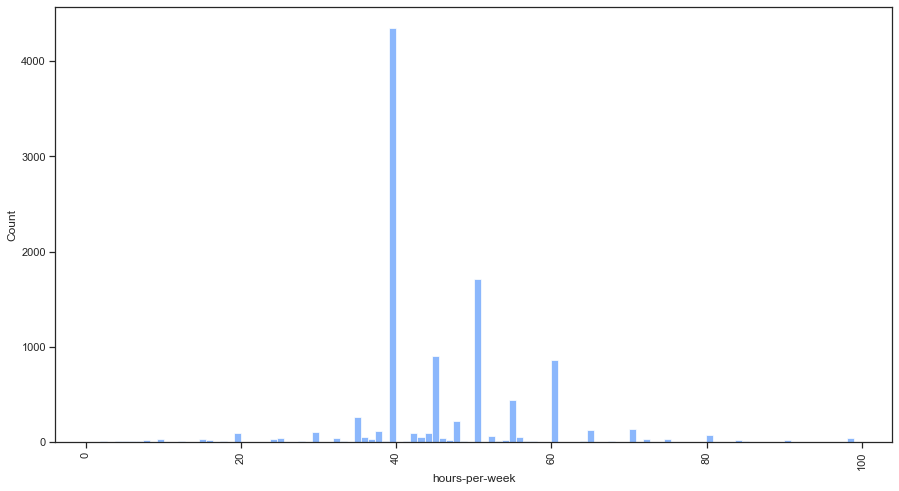

In [18]:
# Among the people who's income > 50K , how many hours per week majority of the people are working 
high_income_working_hour = df_data[df_data["income > 50K"] == "Yes"]
print("Number of people with income>50K are:",len(high_income_working_hour))
high_income_working_hour = high_income_working_hour[["hours-per-week", "income > 50K"]]
# print(high_income_working_hour)
plt.figure(figsize=(15, 8))
plt.xticks(rotation = 90)
sns.histplot(x="hours-per-week", data=high_income_working_hour, color = '#649ffc')

print("Number of working hours per week of majority of people whose income is > 50K:",\
      len(high_income_working_hour[high_income_working_hour["hours-per-week"] == 40]))
#print((len(high_income_working_hour)/43957)*100)
#print(len(high_income_working_hour[high_income_working_hour["hours-per-week"] == 40])/len(high_income_working_hour))

#### Description:

1. There are 10518 people whose income is greater than 50K which is around 24%.
2. Among these 10518 people majority of the people are working 40 hours per week 
3. There are 4353 people who are working 40 hours per week which is nearly 41.5 percent of the people whose income is greater      than 50K

Number of people with income>50K are: 10518
Total number of people whose income is greater than 50K and martial status is married-civ-spouse is : 8985


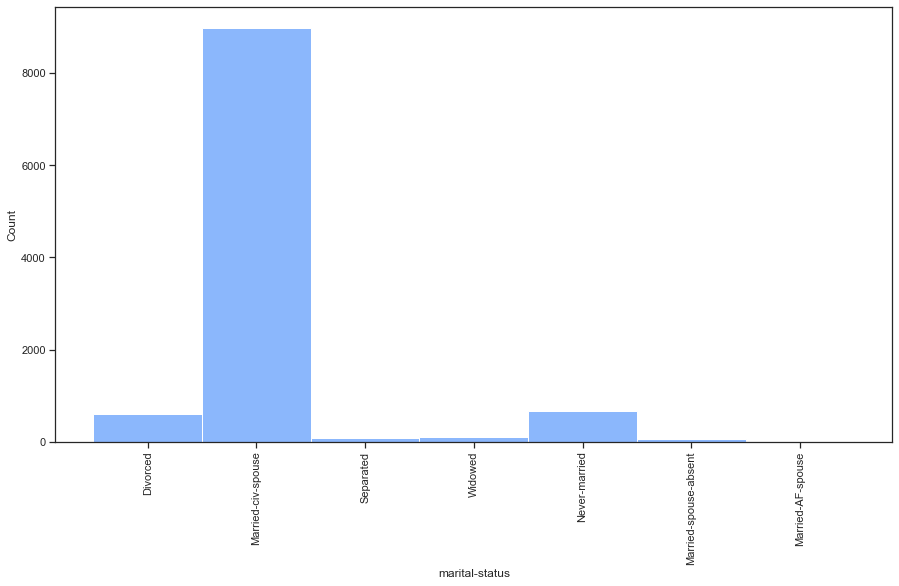

In [19]:
# Among the people who's income > 50K, what is the marital status of the majority of the people      
high_income_marrige = df_data[df_data["income > 50K"] == "Yes"]
print("Number of people with income>50K are:",len(high_income_marrige))
high_income_marrige = high_income_marrige[["marital-status", "income > 50K"]]
print("Total number of people whose income is greater than 50K and martial status is married-civ-spouse is :",\
      len(high_income_marrige[high_income_marrige["marital-status"]=="Married-civ-spouse"]))
#print((8985/10518)*100)
# print(high_income_marrige)
plt.figure(figsize=(15, 8))
plt.xticks(rotation = 90)
sns.histplot(x="marital-status", data=high_income_marrige, color = '#649ffc')

### Description: 

1. There are 10518 people whose income is greater than 50K which is around 24%.
2. Majority of the people whose income > 50K has marital status as Married-civ-spouse.
3. There are 8985 people whose marital status  is married-civ-spouse among 10518 people which is around 85.5%
4. Among the people whose income is greater than 50K, only 11 people have martial status as Married-AF-spouse 

Total number of people with income > 50K and relatioship as husband is: 7965


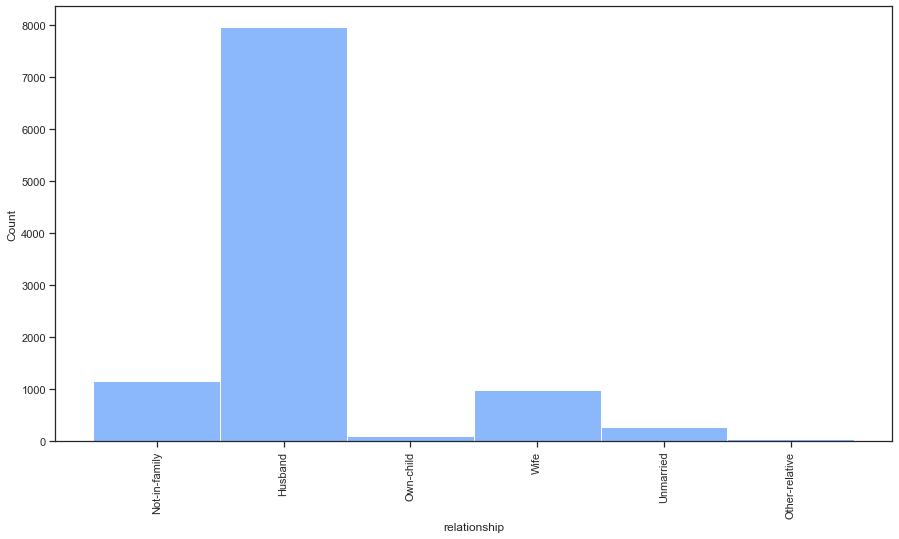

In [20]:
sns.set(style="ticks")

high_income = df_data[df_data["income > 50K"] == "Yes"]
high_income_relation = high_income[["relationship","income > 50K"]]

#print(len(high_income_relation[high_income_relation["relationship"] == "Husband"]))#
#a=df_data[df_data["relationship"] == "Husband"]
#print("number of people with relationship husband",len(a))
#print(((7965)/17749)*100)

print("Total number of people with income > 50K and relatioship as husband is:", \
      len(high_income_relation[high_income_relation["relationship"] == "Husband"]))

#print("Total number of people with income > 50K and relatioship as other relative is:", \
#      len(high_income_relation[high_income_relation["relationship"] == "Other-relative"]))

plt.figure(figsize=(15, 8))
plt.xticks(rotation = 90)
sns.histplot(x="relationship", data=high_income_relation, color = '#649ffc')

### Description

1. Majority of the people whose income is greater than 50K has Husband relationship.
2. There are 17749 people with relationship husband and among them 7965 of them has income >50K, which is around 45%.
3. Only 46 people has relationship other-relative and income greater than 50K, which is the lowest.